# Определение перспективного тарифа для телеком-компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<br>**Описание тарифов**:
<br>
<br>Тариф «Смарт»
<br>1. Ежемесячная плата: 550 рублей
<br>2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
<br>3. Стоимость услуг сверх тарифного пакета:
<br>- минута разговора: 3 рубля
<br>- сообщение: 3 рубля
<br>- 1 Гб интернет-трафика: 200 рублей
<br>Тариф «Ультра»
<br>1. Ежемесячная плата: 1950 рублей
<br>2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
<br>3. Стоимость услуг сверх тарифного пакета:
<br>- минута разговора: 1 рубль
<br>- сообщение: 1 рубль
<br>- 1 Гб интернет-трафика: 150 рублей
<br>
<br>**Примечание**:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
<br>
<br>**Описание данных**
<br>Таблица users (информация о пользователях):
<br>user_id — уникальный идентификатор пользователя
<br>first_name — имя пользователя
<br>last_name — фамилия пользователя
<br>age — возраст пользователя (годы)
<br>reg_date — дата подключения тарифа (день, месяц, год)
<br>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<br>city — город проживания пользователя
<br>tarif — название тарифного плана
<br>
<br>Таблица calls (информация о звонках):
<br>id — уникальный номер звонка
<br>call_date — дата звонка
<br>duration — длительность звонка в минутах
<br>user_id — идентификатор пользователя, сделавшего звонок
<br>
<br>Таблица messages (информация о сообщениях):
<br>id — уникальный номер сообщения
<br>message_date — дата сообщения
<br>user_id — идентификатор пользователя, отправившего сообщение
<br>
<br>Таблица internet (информация об интернет-сессиях):
<br>id — уникальный номер сессии
<br>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<br>session_date — дата интернет-сессии
<br>user_id — идентификатор пользователя
<br>
<br>Таблица tariffs (информация о тарифах):
<br>tariff_name — название тарифа
<br>rub_monthly_fee — ежемесячная абонентская плата в рублях
<br>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<br>messages_included — количество сообщений в месяц, включённых в абонентскую плату
<br>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<br>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<br>rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<br>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Содержание

## Изучение данных из файла

### Импорт нужных библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats as st

### Открытие файлов

In [2]:
data_users = pd.read_csv('/datasets/users.csv')
data_calls =  pd.read_csv('/datasets/calls.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0) # убираем лишний столбец при открытии файла 
#(подсказка из треда ЯП)
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
pd.options.display.max_columns = None

### Изучение информации о данных и первый взгляд на них

#### Отображение датафреймов с информацией о них

Здесь я решил использовать цикл, чтобы открыть отобразить сразу все датафреймы подряд с информацией о них

In [3]:
dataframes = [data_users, data_calls, data_messages, data_internet, data_tariffs]
for i in range(len(dataframes)):
    names = ['Users', 'Calls', 'Messages', 'Internet', 'Tariffs']
    print(names[i])
    display(dataframes[i].head(10))
    dataframes[i].info()
    print('************************************************')

Users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 500 entries, 0 to 499

Data columns (total 8 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   user_id     500 non-null    int64 

 1   age         500 non-null    int64 

 2   churn_date  38 non-null     object

 3   city        500 non-null    object

 4   first_name  500 non-null    object

 5   last_name   500 non-null    object

 6   reg_date    500 non-null    object

 7   tariff      500 non-null    object

dtypes: int64(2), object(6)

memory usage: 31.4+ KB

************************************************

Calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 202607 entries, 0 to 202606

Data columns (total 4 columns):

 #   Column     Non-Null Count   Dtype  

---  ------     --------------   -----  

 0   id         202607 non-null  object 

 1   call_date  202607 non-null  object 

 2   duration   202607 non-null  float64

 3   user_id    202607 non-null  int64  

dtypes: float64(1), int64(1), object(2)

memory usage: 6.2+ MB

************************************************

Messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 123036 entries, 0 to 123035

Data columns (total 3 columns):

 #   Column        Non-Null Count   Dtype 

---  ------        --------------   ----- 

 0   id            123036 non-null  object

 1   message_date  123036 non-null  object

 2   user_id       123036 non-null  int64 

dtypes: int64(1), object(2)

memory usage: 2.8+ MB

************************************************

Internet


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>

Int64Index: 149396 entries, 0 to 149395

Data columns (total 4 columns):

 #   Column        Non-Null Count   Dtype  

---  ------        --------------   -----  

 0   id            149396 non-null  object 

 1   mb_used       149396 non-null  float64

 2   session_date  149396 non-null  object 

 3   user_id       149396 non-null  int64  

dtypes: float64(1), int64(1), object(2)

memory usage: 5.7+ MB

************************************************

Tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2 entries, 0 to 1

Data columns (total 8 columns):

 #   Column                 Non-Null Count  Dtype 

---  ------                 --------------  ----- 

 0   messages_included      2 non-null      int64 

 1   mb_per_month_included  2 non-null      int64 

 2   minutes_included       2 non-null      int64 

 3   rub_monthly_fee        2 non-null      int64 

 4   rub_per_gb             2 non-null      int64 

 5   rub_per_message        2 non-null      int64 

 6   rub_per_minute         2 non-null      int64 

 7   tariff_name            2 non-null      object

dtypes: int64(7), object(1)

memory usage: 256.0+ bytes

************************************************


Вывод по датафреймам:
<br>В столбце churn_date много пропусков. Делать с ними ничего не будем, т.к. в условии сказано, что "если значение пропущено, то тариф ещё действовал на момент выгрузки данных". В столбце reg_date надо изменить тип данных на datetime. Для более простой работы с тарифами, можно заменить их значениями 1 и 2 (smart и ultra соответственно).
<br>В таблице calls пропусков нет.
Для более простой работы со столбцом id удалим нижнее подчеркивание. Это не повлияет на уникальность значения.
В столбце call_date надо изменить тип данных на datetime.
В столбце duration данные необходимо округлить в большую сторону и преобразовать тип в целочисленный в соответствии с условием задачи.
Нулевые значения в столбце duration соответствуют пропущенным звонкам. Пока оставим их как есть.
<br>В таблице messages пропусков нет.
Для более простой работы со столбцом id удалим нижнее подчеркивание. Это не повлияет на уникальность значения.
В столбце message_date надо изменить тип данных на datetime.
<br>В таблице internet пропусков нет.
Для более простой работы со столбцом id удалим нижнее подчеркивание. Это не повлияет на уникальность значения. 
В столбце session_date надо изменить тип данных на datetime.
В столбце mb_used данные необходимо округлить в большую сторону и преобразовать тип в целочисленный в соответствии с условием задачи.
Столбец Unnamed: 0 предлагаю удалить, т.к. он ни на что не влияет.

#### Проверка датафреймов методом describe()

In [4]:
for i in range(len(dataframes)):
    names = ['Users describe', 'Calls describe', 'Messages describe', 'Internet describe', 'Tariffs describe']
    print(names[i])
    display(dataframes[i].describe())
    print('***********************')

Users describe


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


***********************

Calls describe


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


***********************

Messages describe


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


***********************

Internet describe


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


***********************

Tariffs describe


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


***********************


###### Вывод по шагу 1

Все таблицы благополучно открыты и проверены на предмет наличия в них данных, а также проверены методом describe, чтобы сразу получить информацию о содержимом.

## Подготовка данных

### Проверка на наличие пропусков

In [5]:
for i in range(len(dataframes)):
    names = [
        'Users missing values', 
        'Calls missing values', 
        'Messages missing values', 
        'Internet missing values', 
        'Tariffs missing values'
    ]
    print(names[i])
    display(dataframes[i].isna().sum())
    print('*****************')

Users missing values


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

*****************

Calls missing values


id           0
call_date    0
duration     0
user_id      0
dtype: int64

*****************

Messages missing values


id              0
message_date    0
user_id         0
dtype: int64

*****************

Internet missing values


id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

*****************

Tariffs missing values


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

*****************


Пропусков нет, кроме тех, что обозначают присутствие человека в тарифе (отсутствие пропуска заполняется датой выхода из тарифа)

### Проверка на наличие  дубликатов

In [6]:
for i in range(len(dataframes)):
    names = ['Users duplicates', 'Calls duplicates', 'Messages duplicates', 'Internet duplicates', 'Tariffs duplicates']
    print(names[i])
    display(dataframes[i].duplicated().sum())
    print('******')

Users duplicates


0

******

Calls duplicates


0

******

Messages duplicates


0

******

Internet duplicates


0

******

Tariffs duplicates


0

******


Вывод: Убедились, что дубликатов в датафреймах нет.

### Изменение формата дат

В дальнейшем нам предстоит работать с датами в таблицах, но они в формате object. Изменим формат на datetime

In [7]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

Для того, чтобы было проще считать помесячные показатели, меняем отображение дат в таблицах calls, internet и messages с привычного формата Y:M:D на отображения месяца действия

In [8]:
data_calls['calls_month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_internet['internet_month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_messages['messages_month'] = pd.DatetimeIndex(data_messages['message_date']).month

### Таблица users

#### Замена названий тарифов на идентификаторы

In [9]:
data_users['tariff'] = data_users['tariff'].str.replace('smart','1')
data_users['tariff'] = data_users['tariff'].str.replace('ultra','2')

#### Изменение формата времени

Выше мы увидели, что данные столбцов reg_date и churn_date в таблице users имеют формат object. Приведем данные в этих столбцах к формату datetime.

In [10]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

#### Распределение пользователей по городам

В дальнейшем нам понадобится проверить гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Для этого посмотрим, как распределены пользователи по городам

In [11]:
data_users.groupby('city')['city'].count().sort_values(ascending=False)

city
Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Подольск            1
Химки               1
Иваново             1
Нижневартовск       1
Архангельск         1
Name: city, Length: 76, dtype: int64

### Таблица calls

В соответствии с шагом 2 в инструкции по выполнению проекта, проанализируем данные из таблиц, а в частности, посмотрим, как распределяются звонки всей выборки клиентов

#### Посмотрим на распределение звонков по месяцам

In [12]:
data_calls.head(5)

,id,call_date,duration,user_id,calls_month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Text(0, 0.5, 'Кол-во минут звонков')

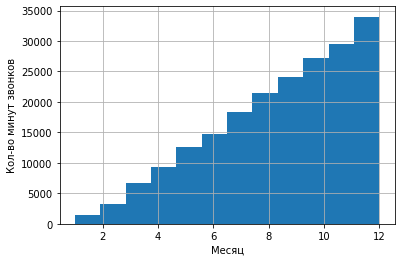

In [13]:
data_calls['calls_month'].plot(kind='hist', bins=12, grid=True)
plt.xlabel('Месяц')
plt.ylabel("Кол-во минут звонков")

На графике видим, что количество звонков растет с каждыми месяцем. Скорее всего, это связано с тем, что растет популярность оператора сотовой связи или хорошо работает конкретная рекламная акция.

#### Удалим нижнее подчеркивание из столбца id

In [14]:
data_calls['id'] = data_calls['id'].replace(to_replace='_', value='', regex=True)
data_calls['id'] = data_calls['id'].astype('int64')

#### Округлим значения длительности звонков в соответствии  с тем, как сказано в условии - в большую сторону.

Для начала отобразим столбец duration таблицы calls

In [15]:
display(data_calls['duration'].head(5))

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

В соответствии с условием проекта нам необходимо округлить длительность звонков до целых значений в большую сторону

In [16]:
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls['duration'] = data_calls['duration'].astype('int64')
display(data_calls['duration'].head(5))

0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64

#### Посмотрим количество пропущенных звонков  (длительность = 0) и построим гистограмму, чтобы посмотреть распределение звонков по длительности

При открытии таблицы calls мы видели, что общее кол-во звонков - 202607. Посмотрим, какое кол-во пропущенных звонков

In [17]:
print('Кол-во пропущенных звонков', len(data_calls.loc[data_calls['duration'] == 0]))
print('Доля пропущенных звонков от общего кол-ва звонков', 
      len(data_calls.loc[data_calls['duration'] == 0]) * 100 / len(data_calls), '%')

Кол-во пропущенных звонков 39613

Доля пропущенных звонков от общего кол-ва звонков 19.551644316336553 %


Видим вполне нормальное количество пропущенных звонков - 19,6%.

#### Посмотрим, как распределена длительность звонков в минутах

Text(0, 0.5, 'Кол-во звонков')

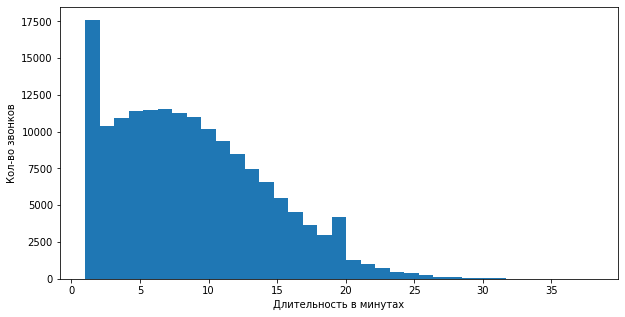

In [18]:
data_calls.loc[data_calls['duration'] != 0, 'duration'].plot(kind='hist', figsize=(10,5), bins=35)
plt.xlabel('Длительность в минутах')
plt.ylabel('Кол-во звонков')

Довольно правдоподобное распределение длительности звонков

Получим более ясную картину в цифрах - проверим все звонки, длительность которых > 0, методом describe

In [19]:
data_calls.loc[data_calls['duration'] != 0, 'duration'].describe()

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

Видим, что среднее значение длительности звонков 8.9 минут, а медиана - 8 минут.

### Таблица messages

#### Посмотрим на распределение кол-ва сообщений по месяцам

<AxesSubplot:ylabel='Frequency'>

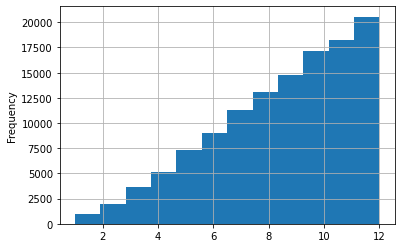

In [20]:
data_messages['messages_month'].plot(kind='hist', bins=12, grid=True)

Видим схожую со звонками картину. Объяснение то же.

#### Удалим нижнее подчеркивание из столбца id

In [21]:
data_messages['id'] = data_messages['id'].replace(to_replace='_', value='', regex=True)
data_messages['id'] = data_messages['id'].astype('int64')

In [22]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 123036 entries, 0 to 123035

Data columns (total 4 columns):

 #   Column          Non-Null Count   Dtype         

---  ------          --------------   -----         

 0   id              123036 non-null  int64         

 1   message_date    123036 non-null  datetime64[ns]

 2   user_id         123036 non-null  int64         

 3   messages_month  123036 non-null  int64         

dtypes: datetime64[ns](1), int64(3)

memory usage: 3.8 MB


### Таблица internet

#### Посмотрим на распределение интернет-сессий по месяцам

Text(0, 0.5, 'Кол-во мегабайт в месяц')

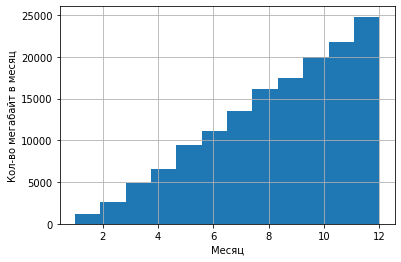

In [23]:
data_internet['internet_month'].plot(kind='hist', bins=12, grid=True)
plt.xlabel('Месяц')
plt.ylabel('Кол-во мегабайт в месяц')

Интернет-трафик растет по той же закономерности, что и звонки, и сообщения.

#### Удалим нижнее подчеркивание из столбца id

In [24]:
data_internet['id'] = data_internet['id'].replace(to_replace='_', value='', regex=True)
data_internet['id'] = data_internet['id'].astype('int64')

In [25]:
data_internet.head()

,id,mb_used,session_date,user_id,internet_month
0,10000,112.95,2018-11-25,1000,11
1,10001,1052.81,2018-09-07,1000,9
2,10002,1197.26,2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


#### Округлим значение мегабайт в соответствии с условием задачи и приведем его к целочисленному формату

In [26]:
#data_internet['mb_used'] = (data_internet['mb_used'].apply(np.ceil))
#data_internet['mb_used'] = (data_internet['mb_used'].astype('int64'))

Посмотрим кол-во сессий с нулевыми значениями, потому что они могут существенно повлиять на ту часть данных, которая нас интересует

In [27]:
len(data_internet.loc[data_internet['mb_used'] == 0])
print('Кол-во сессий с нулевым трафиком интернета', len(data_internet.loc[data_internet['mb_used'] == 0]))
print('Доля сессий с нулевым трафиком интернета', 
      len(data_internet.loc[data_internet['mb_used'] == 0]) * 100 / len(data_internet), '%')

Кол-во сессий с нулевым трафиком интернета 19598

Доля сессий с нулевым трафиком интернета 13.118155773916303 %


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Таблица содержит идентификатор сессий и идентификатор пользователя. Значит пользователь устанавливал соединение и авторизовался. Но трафик нулевой. И это аномалия, возможно, что она связана с техничесткими проблемами оператора. Нам в данном проекте нулевые сессии не мешают, но в выводах исследования мы должны были этот факт указать, так как это не полученная выручка оператора при существующем спросе на услугу пользователей.</font>

Нулевых значений примерно 13% от общего числа. Это может говорить о том, что абонент не использует интернет или у него какие-то неполадки с ним.
<br>Теперь посмотрим распределение по объему сессий

Text(0, 0.5, 'Кол-во сессий')

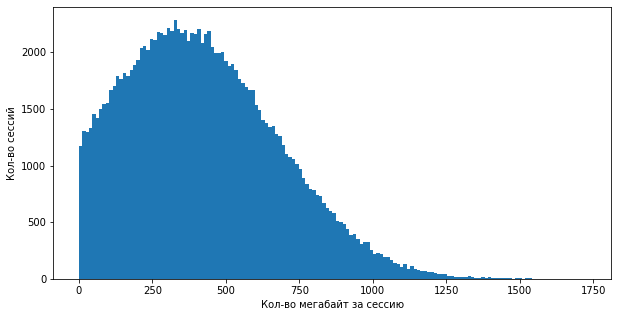

In [28]:
data_internet.loc[data_internet['mb_used'] != 0, 'mb_used'].plot(kind='hist', figsize=(10,5), bins=150)
plt.xlabel('Кол-во мегабайт за сессию')
plt.ylabel('Кол-во сессий')

Из распределения видим, что пик по количеству используемых за сессию мегабайт выпадает на значение между 250 и 500. Проверим это методом describe

In [29]:
data_internet.loc[data_internet['mb_used'] !=0, 'mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

Видим, что среднее значение использованных мегабайт ~427, а медианное значение - 401 мегабайт.

### Таблица tariffs

#### Добавим в таблицу колонку с идентификаторами тарифов

In [30]:
data_tariffs['tariff'] = data_tariffs['tariff_name']

In [31]:
data_tariffs['tariff'] = data_tariffs['tariff'].str.replace('smart','1')
data_tariffs['tariff'] = data_tariffs['tariff'].str.replace('ultra','2')

#### Проанализируем таблицу tariffs

In [32]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,tariff
0,50,15360,500,550,200,3,3,smart,1
1,1000,30720,3000,1950,150,1,1,ultra,2


Подсказка из треда в слаке сориентировала меня, что необходимо будет объединить все таблицы в одну и сделать это лучше по столбцу tariff, который необходимо предварительно создать путем переименования столбца tariff_name

Вывод: добавили столбец tariff, по которому в дальнейшем будем объединять таблицы

### Предварительные расчеты 

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

В соответствии с условием проекта в шаге 2 посчитаем количество сделанных звонков и минут разговора для каждого пользователя по месяцам

In [33]:
data_calls_month = data_calls.pivot_table(index = 'user_id', columns = 'calls_month', values = 'id', aggfunc = 'count')
display(data_calls_month)

calls_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,112.0,152.0,129.0,155.0
1496,7.0,77.0,79.0,67.0,63.0,74.0,73.0,88.0,68.0,72.0,80.0,80.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,64.0,71.0


Таким образом, мы построили таблицу, в которой у нас содержатся данные о количестве звонков каждого пользователя в течение каждого месяца

Сделаем то же самое, только теперь выведем кол-во минут разговора по месяцам для каждого пользователя

In [34]:
data_minutes_month = data_calls.pivot_table(index = 'user_id', columns = 'calls_month', values = 'duration', aggfunc = 'sum')
display(data_minutes_month)

calls_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,813.0,1030.0,954.0,1031.0
1496,48.0,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0


#### Количество отправленных сообщений по месяцам

Посчитаем по тому же принципу количество отправленных сообщений по каждому пользователю

In [35]:
data_messages_month = data_messages.pivot_table(index = 'user_id', columns = 'messages_month', values = 'id', aggfunc = 'count')
display(data_messages_month)

messages_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,82.0,82.0,79.0,84.0
1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,17.0


#### Объем израсходованного интернет-трафика по месяцам

И точно так же посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя

In [36]:
data_traffic_month_mb = data_internet.pivot_table(index = 'user_id', 
                                                  columns = 'internet_month', 
                                                  values = 'mb_used', 
                                                  aggfunc = 'sum')
display(data_traffic_month_mb)

internet_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2614.07,33067.62,29363.00,38939.11,23426.76
1496,3762.73,28489.67,24959.0,21074.67,23709.75,20134.31,24364.76,23530.03,26934.65,28183.17,25063.40,20736.15
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11500.29,14156.08,19918.60


Теперь переведем мегабайты в гигабайты

In [37]:
data_traffic_month_gb = np.ceil(data_traffic_month_mb / 1024)
data_traffic_month_gb

internet_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
1002,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0
1004,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,33.0,29.0,39.0,23.0
1496,4.0,28.0,25.0,21.0,24.0,20.0,24.0,23.0,27.0,28.0,25.0,21.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,14.0,20.0


#### Выручка с каждого пользователя по месяцам

Для того, чтобы посчитать общую выручку с каждого клиента по месяцам, нам необходимо будет собрать все данные в одну таблицу, где будут содержаться данные о расходах по тарифу каждого клиента

Чтобы собрать общую таблицу, для начала соберем данные о количестве минут разговора для каждого пользователя по месяцам с помощью groupby() и переименуем колонки для удобства дальнейших объединений

In [38]:
grouped_calls_data = data_calls.groupby(['user_id', 'calls_month'], as_index=False)['duration'].agg('sum')
grouped_calls_data.columns = ['user_id', 'month', 'calls_duration']
grouped_calls_data.head()

,user_id,month,calls_duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [39]:
grouped_messages_data = data_messages.groupby(['user_id', 'messages_month'], as_index=False)['id'].agg('count')
grouped_messages_data.columns = ['user_id', 'month', 'message_count']
grouped_messages_data.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [40]:
grouped_internet_data = data_internet.groupby(['user_id', 'internet_month'], as_index=False)['mb_used'].agg('sum')
grouped_internet_data.columns = ['user_id', 'month', 'traffic']
grouped_internet_data['traffic'] = np.ceil(grouped_internet_data['traffic'] / 1024)
grouped_internet_data.head()

,user_id,month,traffic
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


После того, как мы создали таблицы с основными показателями по каждому пользователю (длительность звонков, кол-во сообщений и кол-во использованного трафика), объединим эти данные в одну таблицу

In [41]:
revenue = grouped_calls_data.merge(grouped_messages_data, on = ['user_id', 'month'], how='outer')
revenue = revenue.merge(grouped_internet_data, on = ['user_id', 'month'], how='outer')
revenue = revenue.merge(data_users[['user_id', 'tariff', 'city']], how='left', on='user_id')

In [42]:
display(revenue.head())

,user_id,month,calls_duration,message_count,traffic,tariff,city
0,1000,5,159.0,22.0,3.0,2,Краснодар
1,1000,6,172.0,60.0,23.0,2,Краснодар
2,1000,7,340.0,75.0,14.0,2,Краснодар
3,1000,8,408.0,81.0,14.0,2,Краснодар
4,1000,9,466.0,57.0,15.0,2,Краснодар


Для дальнейших вычислений также добавим таблицу data_tariffs к revenue, чтобы видеть лимиты по тарифам

In [43]:
revenue = revenue.merge(data_tariffs, on = 'tariff', how='left')

In [44]:
display(revenue)

,user_id,month,calls_duration,message_count,traffic,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,3.0,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,60.0,23.0,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,75.0,14.0,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,81.0,14.0,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,57.0,15.0,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3210,1489,10,NaN,21.0,20.0,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3211,1489,11,NaN,20.0,18.0,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart
3212,1489,12,NaN,35.0,17.0,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart


In [45]:
# Комментарий ревьюера
revenue.user_id.unique().shape 

(498,)

In [46]:
# Комментарий ревьюера
temp = data_users.copy()
temp[(temp.user_id ==  1128) | (temp.user_id ==  1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,2
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,1


In [47]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 3214 entries, 0 to 3213

Data columns (total 15 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   user_id                3214 non-null   int64  

 1   month                  3214 non-null   int64  

 2   calls_duration         3174 non-null   float64

 3   message_count          2717 non-null   float64

 4   traffic                3203 non-null   float64

 5   tariff                 3214 non-null   object 

 6   city                   3214 non-null   object 

 7   messages_included      3214 non-null   int64  

 8   mb_per_month_included  3214 non-null   int64  

 9   minutes_included       3214 non-null   int64  

 10  rub_monthly_fee        3214 non-null   int64  

 11  rub_per_gb             3214 non-null   int64  

 12  rub_per_message        3214 non-null   int64  

 13  rub_per_minute         3214 non-null   int64  

 14  tariff_name            3214 non-null 

Видим пропуски в колонках calls_duration, message_count и traffic. Для дальнейших расчетов заполним их числом 0 и приведем данные к целочисленному типу

In [48]:
revenue['calls_duration'] = revenue['calls_duration'].fillna(0)
revenue['calls_duration'] = revenue['calls_duration'].astype('int64')

In [49]:
revenue['message_count'] = revenue['message_count'].fillna(0)
revenue['message_count'] = revenue['message_count'].astype('int64')

In [50]:
revenue['traffic'] = revenue['traffic'].fillna(0)
revenue['traffic'] = revenue['traffic'].astype('int64')

</font><font color='Blue'><b>Комментарий студента
- Согласен. Исправил </b></font><br>

In [51]:
revenue['gb_per_month_included'] = revenue['mb_per_month_included'] / 1024
revenue['gb_per_month_included'] = (revenue['gb_per_month_included']).astype('int')
#Решил добавить в таблицу колонку gb_per_month_included, чтобы было удобнее работать с трафиком, переведенным в гигабайты

In [52]:
display(revenue)

,user_id,month,calls_duration,message_count,traffic,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,5,159,22,3,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30
1,1000,6,172,60,23,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30
2,1000,7,340,75,14,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30
3,1000,8,408,81,14,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30
4,1000,9,466,57,15,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,32,17,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart,15
3210,1489,10,0,21,20,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart,15
3211,1489,11,0,20,18,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart,15
3212,1489,12,0,35,17,1,Санкт-Петербург,50,15360,500,550,200,3,3,smart,15


Для того, чтобы рассчитать, сколько выручки было получено с каждого клиента, воспользуемся формулой из условий проекта: 
- вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- остаток умножим на значение из тарифного плана; 
- прибавим абонентскую плату, соответствующую тарифному плану.
Применим эту формулу в рамках функции revenue_total

In [53]:
def revenue_total(row):
    personal_revenue = row['rub_monthly_fee']
    if row['calls_duration'] > row['minutes_included']:
        personal_revenue += (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    if row['message_count'] > row['messages_included']:
        personal_revenue += (row['message_count'] - row['messages_included']) * row['rub_per_message']
    if row['traffic'] > row['gb_per_month_included']:
        personal_revenue += (row['traffic'] - row['gb_per_month_included']) * row['rub_per_gb']
    return personal_revenue

revenue['personal_revenue'] = revenue.apply(revenue_total, axis=1)
display(revenue.head(10))

,user_id,month,calls_duration,message_count,traffic,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,personal_revenue
0,1000,5,159,22,3,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
1,1000,6,172,60,23,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
2,1000,7,340,75,14,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
3,1000,8,408,81,14,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
4,1000,9,466,57,15,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
5,1000,10,350,73,15,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
6,1000,11,338,58,15,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
7,1000,12,333,70,10,2,Краснодар,1000,30720,3000,1950,150,1,1,ultra,30,1950
8,1001,11,430,0,18,1,Москва,50,15360,500,550,200,3,3,smart,15,1150
9,1001,12,414,0,14,1,Москва,50,15360,500,550,200,3,3,smart,15,550


In [54]:
revenue_pivot = (revenue.pivot_table(index = 'user_id', columns = 'month', values = 'personal_revenue', aggfunc = 'first'))
display('Помесячная выручка', revenue_pivot.head())

'Помесячная выручка'

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


###### Вывод по шагу 2

Данные успешно проверены на наличие пропусков и дубликатов, а также приведены к необходимым для дальнейшего исследования типам данных. 
Были построены гистограммы, которые помогли выявить линейный рост количества используемых пакетных опций - звонков, минут разговора, сообщений, интернет-трафика.
Сделаны расчеты вышеуказанных пакетных опций для каждого отдельного клиента по месяцам.

## Анализ данных

Руководствуясь заданием из проекта, нам необходимо проанализировать поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?;
- Посчитать среднее количество, дисперсию и стандартное отклонение; 
- Построить гистограммы;
- Описать распределения.

### Анализ минут разговора

#### Расчет статистических значений для звонков

Рассчитаем статистические значения для минут разговора, для этого создадим функцию stats_analysis

In [55]:
def stats_analysis(column, tariff):
    #создаем отдельный датафрейм, который содержит значения только по определенному тарифу, а также учитывает все значения
    #в рамках интересующей нас колонки column - количество минут разговора, количество сообщений и объем интернет-трафика
    avg_by_tariff = (revenue.loc[(revenue[column] >= 0) 
                    & (revenue['tariff_name'] == tariff)].groupby('user_id')[column].agg('mean')
                    )
    #затем выводим поочередно среднее, дисперсию и стандартное отклонение для конкретного тарифа
    print('Тариф', tariff)
    print('Среднее значение', round(avg_by_tariff.mean(), 0))
    print('Дисперсия', round(np.var(avg_by_tariff), 0))
    print('Стандартное отклонение', round(np.sqrt(np.var(avg_by_tariff)), 0))
    return avg_by_tariff

In [56]:
calls_duration_smart = stats_analysis('calls_duration', 'smart')

Тариф smart

Среднее значение 420.0

Дисперсия 20974.0

Стандартное отклонение 145.0


In [57]:
calls_duration_ultra = stats_analysis('calls_duration', 'ultra')

Тариф ultra

Среднее значение 528.0

Дисперсия 78867.0

Стандартное отклонение 281.0


По результатам вычислений видим вполне очевидную картину:
- среднее по тарифу смарт в части минут разговора меньше, чем среднее по тарифу ультра;
- судя по стандартному отклонению, значения в тарифе смарт больше сгруппированы вокруг своего среднего, чем в тарифе ультра

#### Построение графиков по звонкам

Text(0, 0.5, 'Кол-во случаев')

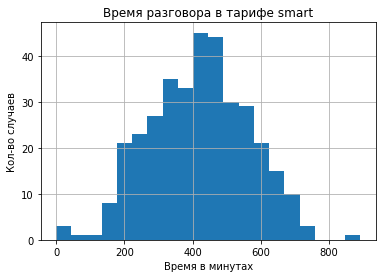

In [58]:
calls_duration_smart.hist(bins=20)
plt.title('Время разговора в тарифе smart')
plt.xlabel('Время в минутах')
plt.ylabel('Кол-во случаев')

Text(0, 0.5, 'Кол-во случаев')

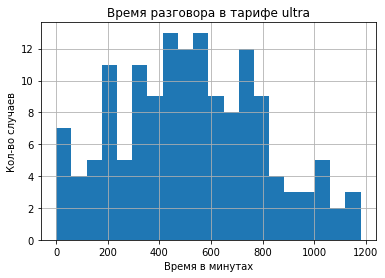

In [59]:
calls_duration_ultra.hist(bins=20)
plt.title('Время разговора в тарифе ultra')
plt.xlabel('Время в минутах')
plt.ylabel('Кол-во случаев')

Text(0, 0.5, 'Кол-во случаев')

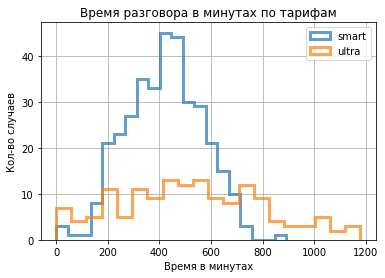

In [60]:
calls_duration_smart.plot(kind = 'hist', 
                          histtype = 'step', 
                          bins=20, 
                          alpha = 0.7, 
                          linewidth = 3, 
                          grid = True,
                          legend = True,
                          label = 'smart')
calls_duration_ultra.plot(kind='hist', 
                          histtype = 'step', 
                          bins=20, 
                          alpha = 0.7, 
                          linewidth = 3, 
                          grid = True,
                          legend = True,
                          label='ultra')
plt.title('Время разговора в минутах по тарифам')
plt.xlabel('Время в минутах')
plt.ylabel('Кол-во случаев')

На гистограммах видим, что значения в тарифе ультра немного скошены вправо, в сторону увеличения количества минут разговора, а также они более широко  распределены по оси х.

#### Расчет доли превышений лимита для минут разговора

Посмотрим, насколько часто пользователи тарифов превышают лимит минут разговора в месяц. Для этого создадим функцию, которая посчитает значение превышения

In [61]:
def overlimited_percent(grouped_series, limit):
    overlimited_counter = 0
    for i in grouped_series:
        if i > limit:
            overlimited_counter += 1
    return print('Доля превышений по лимиту тарифа', 
        round(overlimited_counter * 100 / grouped_series.count(), 2), 
        '%')

In [62]:
overlimited_percent(calls_duration_smart, 500)

Доля превышений по лимиту тарифа 29.14 %


In [63]:
overlimited_percent(calls_duration_ultra, 3000)

Доля превышений по лимиту тарифа 0.0 %


Видим, что для тарифа smart у нас превышение лимита по минутам разговора встречается более, чем в 29% случаев. Значит, нужно посоветовать провайдеру предложить этим пользователям новый тариф или оптимизировать нынешний.
Превышений по тарифу ultra не выявлено, однако можем видеть, что очень малое количество пользователей достигает даже 1200 минут, что уж говорить про 3000. Компании, предоставляющей услуги, это выгодно. Однако можно было бы скорректировать и этот тариф в сторону уменьшения стоимости и объема предоставляемых пакетов услуг.

### Анализ количества сообщений

#### Расчет статистических значений для сообщений

Таким же образом проанализируем количество сообщений по каждому из тарифов

In [64]:
message_count_smart = stats_analysis('message_count', 'smart')

Тариф smart

Среднее значение 32.0

Дисперсия 701.0

Стандартное отклонение 26.0


In [65]:
message_count_ultra = stats_analysis('message_count', 'ultra')

Тариф ultra

Среднее значение 54.0

Дисперсия 2135.0

Стандартное отклонение 46.0


Ситуация, похожая на то, что мы видели со звонками - среднее по тарифу smart меньше, чем среднее по тарифу ultra, что логично, а также дисперсия по значениям в тарифе smart распределена ближе к среднему, чем в тарифе ultra. 

#### Построение графиков по сообщениям

Text(0, 0.5, 'Кол-во случаев')

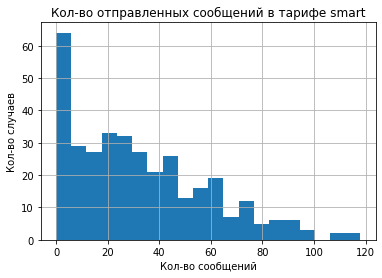

In [66]:
message_count_smart.hist(bins=20)
plt.title('Кол-во отправленных сообщений в тарифе smart')
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во случаев')

Text(0, 0.5, 'Кол-во случаев')

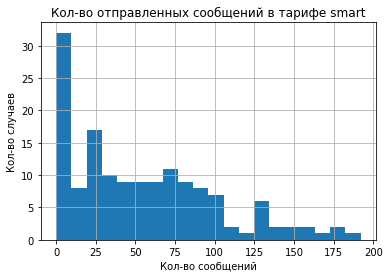

In [67]:
message_count_ultra.hist(bins=20)
plt.title('Кол-во отправленных сообщений в тарифе smart')
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во случаев')

По графикам видим скошенность вправо, соответственно, делаем вывод, что относительно большое количество сообщений отправляет меньшее количество клиентов

Text(0, 0.5, 'Кол-во случаев')

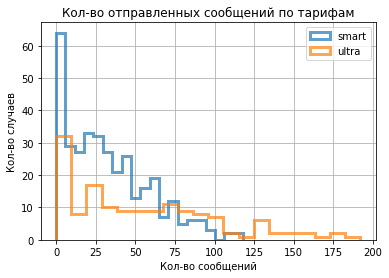

In [68]:
message_count_smart.plot(kind = 'hist', 
                          histtype = 'step', 
                          bins=20, 
                          alpha = 0.7, 
                          linewidth = 3, 
                          grid = True,
                          legend = True,
                          label = 'smart')
message_count_ultra.plot(kind='hist', 
                          histtype = 'step', 
                          bins=20, 
                          alpha = 0.7, 
                          linewidth = 3, 
                          grid = True,
                          legend = True,
                          label='ultra')
plt.title('Кол-во отправленных сообщений по тарифам')
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во случаев')

#### Расчет доли превышений лимита для сообщений

In [69]:
overlimited_percent(message_count_smart, 50)

Доля превышений по лимиту тарифа 22.86 %


In [70]:
overlimited_percent(message_count_ultra, 1000)

Доля превышений по лимиту тарифа 0.0 %


Видим похожую ситуацию, как была со звонками - превышение по лимиту тарифа smart достигается 26,5% процентами пользователей, по тарифу ultra превышения не выявлено. Соответственно, есть смысл скорректировать тариф smart. Если говорить о тарифе ultra, то телеком-компании, конечно, выгодно, когда клиенты приобретают большой пакет опций и не используют его по полной. Соответственно, можно дать рекомендацию скорректировать и этот тариф в сторону уменьшения пакета услуг.

### Анализ объема интернет-трафика

#### Расчет статистических значений для интернет-трафика

Похожим образом проанализируем объем интернет-трафика

In [71]:
internet_traffic_smart = stats_analysis('traffic', 'smart')

Тариф smart

Среднее значение 16.0

Дисперсия 12.0

Стандартное отклонение 3.0


In [72]:
internet_traffic_ultra = stats_analysis('traffic', 'ultra')

Тариф ultra

Среднее значение 20.0

Дисперсия 65.0

Стандартное отклонение 8.0


Видим, что средние значения не так уж сильно отличаются, а стандартное отклонение отличается более чем в 2 раза, из чего можем сделать вывод, что значения в тарифе ultra распределены намного более широко, чем в тарифе smart

#### Построение графиков по звонкам

Text(0, 0.5, 'Кол-во случаев')

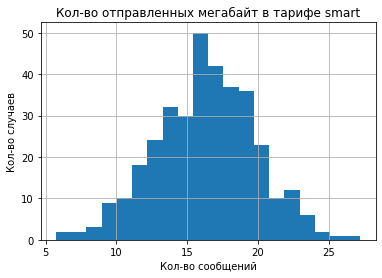

In [73]:
internet_traffic_smart.hist(bins=20)
plt.title('Кол-во отправленных мегабайт в тарифе smart')
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во случаев')

Text(0, 0.5, 'Кол-во случаев')

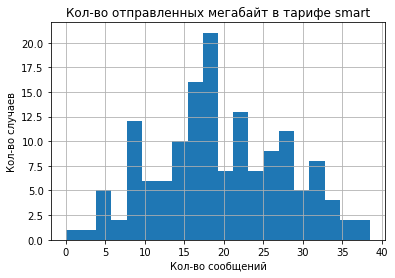

In [74]:
internet_traffic_ultra.hist(bins=20)
plt.title('Кол-во отправленных мегабайт в тарифе smart')
plt.xlabel('Кол-во сообщений')
plt.ylabel('Кол-во случаев')

На графиках видим, что у тарифа smart присутствует скошенность влево, а значения тарифа ultra распределены относительно равномерно

Text(0, 0.5, 'Кол-во случаев')

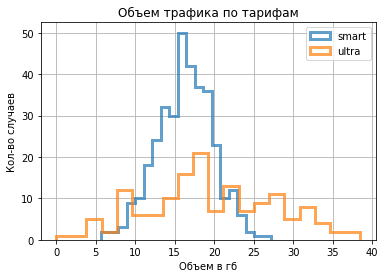

In [75]:
internet_traffic_smart.plot(kind = 'hist', 
                          histtype = 'step', 
                          bins=20, 
                          alpha = 0.7, 
                          linewidth = 3, 
                          grid = True,
                          legend = True,
                          label = 'smart')
internet_traffic_ultra.plot(kind='hist', 
                          histtype = 'step', 
                          bins=20, 
                          alpha = 0.7, 
                          linewidth = 3,
                          grid = True,
                          legend = True,
                          label='ultra')
plt.title('Объем трафика по тарифам')
plt.xlabel('Объем в гб')
plt.ylabel('Кол-во случаев')

#### Расчет доли превышений лимита для интернет-трафика

In [76]:
overlimited_percent(internet_traffic_smart, 15)

Доля превышений по лимиту тарифа 66.57 %


In [77]:
overlimited_percent(internet_traffic_ultra, 30)

Доля превышений по лимиту тарифа 12.84 %


При анализе объема интернет-трафика, используемого клиентами, видим, что по тарифу smart превышение лимита зафиксировано в 66,5% случаев, что означает, что объем трафика в пакете услуг по тарифу smart нужно увеличивать, на мой взгляд, до 22-25 тыс. мегабайт. 
Что касается тарифа ultra, то мы видим, что есть превышение на 12,8%, это не так критично, но можно тоже подумать о том, чтобы увеличить лимит в пакете услуг

### Анализ выручки по тарифам

Построим графики, на которых будет видно различие в выручке между тарифами smart и ultra. А также посмотрим, какова доля переплат в каждом из тарифов

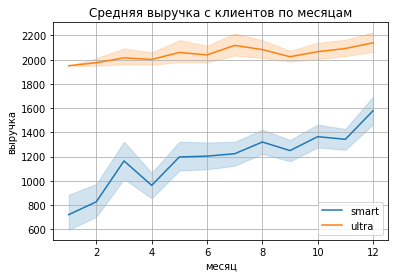

In [78]:
sns.lineplot(data = revenue.loc[revenue['tariff_name'] == 'smart'], 
            x = 'month', y = 'personal_revenue',
            label = 'smart', 
            estimator='mean')
sns.lineplot(data = revenue.loc[revenue['tariff_name'] == 'ultra'], 
            x = 'month', y = 'personal_revenue',
            label = 'ultra', 
            estimator='mean')
plt.xlabel('месяц')
plt.ylabel('выручка')
plt.title('Средняя выручка с клиентов по месяцам')
plt.grid()
plt.legend()

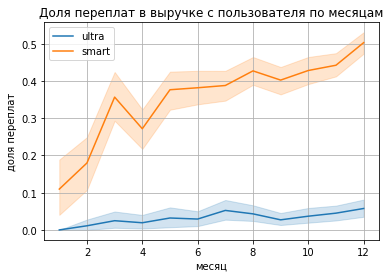

In [79]:
sns.lineplot(x='month', 
             y=(revenue['personal_revenue'] - revenue['rub_monthly_fee']) / revenue['personal_revenue'], 
             data=revenue, 
             hue='tariff_name',
             estimator='mean')
plt.title('Доля переплат в выручке с пользователя по месяцам')
plt.xlabel('месяц')
plt.ylabel('доля переплат')
plt.grid()
plt.legend()

Опираясь на распределение на графиках, мы можем отметить несколько моментов:
- тариф smart хоть и дешевле, но имеет недостаточно объемный пакет услуг, чтобы удовлетворить всех пользователей, вследствие чего случаются переплаты по тарифу, и они достигают 50%;
- тариф ultra дороже, но имеет сравнительно большой объем пакета услуг, вследствие чего переплат по данному тарифу практически не случается;
- на графике, где отображена доля переплат, мы видим, что по тарифу smart доля переплат растет с каждым месяцем и с начальных 10% достигает 50% через год, что является показателем не совсем оптимального тарифа;
- исходя из всех данных, которые мы получили в результате 2 и 3 шагов исследования, можем сделать вывод, что тариф ultra более оптимален для продвижения.

###### Вывод по шагу 3

Данные, полученные в результате выполнения 2 шага, успешно проанализированы, для них были рассчитаны среднее, дисперсия и стандартное отклонение.
Было определено, что большое количество пользователей тарифа smart(к двенадцатому месяцу показатель достиг 50%) совершают переплаты, что говорит нам о необходимости изменения или оптимизации тарифа smart, по тарифу ultra такого замечено не было, переплаты по этому тарифу совершаются редко (до 5% случаев). Возможно, есть смысл рассмотреть введение промежуточного между smart и ultra тарифа.
По итогу, можно сказать, что тариф ultra более оптимален для продвижения.

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт»

- Проверим гипотезу:
 "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
- Для начала сформулируем нулевую гипотезу H0:
"Средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»"
- Сформулируем альтернативную гипотезу H1:
"Средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»"
- Определим уровень значимости alpha = 0.05
- Выборки по клиентам тарифов «Ультра» и «Смарт» не связаны друг с другом. Для расчёта статистики разности и p-value будем использовать функцию st.ttest_ind

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [80]:
revenue_smart = (revenue
                .loc[revenue['tariff_name'] == 'smart']   # срез данных по тарифу smart
                .groupby('user_id')['personal_revenue']   # сгруппируем данные по пользователям
                .agg('mean')                              # посчитаем среднюю месячную выручку с каждого пользователя
                )
revenue_ultra = (revenue
                .loc[revenue['tariff_name'] == 'ultra']   # срез данных по тарифу smart
                .groupby('user_id')['personal_revenue']   # сгруппируем данные по пользователям
                .agg('mean')                              # посчитаем среднюю месячную выручку с каждого пользователя
                )
results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False) # считаем дисперсии выборок разными
print('p-value:', results.pvalue)

p-value: 2.084961899583595e-59


In [81]:
revenue_smart1 = revenue.loc[revenue['tariff_name'] == 'smart'].pivot_table(
    values='personal_revenue', 
    index='user_id', 
    columns='month'
)
revenue_ultra1 = revenue.loc[revenue['tariff_name'] == 'ultra'].pivot_table(
    values='personal_revenue', 
    index='user_id', 
    columns='month'
)
results1 = st.ttest_ind(revenue_smart1, revenue_ultra1, equal_var=False) # считаем дисперсии выборок разными
print('p-value:', results1.pvalue)

p-value: [nan nan nan nan nan nan nan nan nan nan nan nan]


In [82]:
revenue_smart2 = revenue[revenue['tariff_name'] == 'smart']['personal_revenue']
revenue_ultra2 = revenue[revenue['tariff_name'] == 'ultra']['personal_revenue']
results2 = st.ttest_ind(revenue_smart2, revenue_ultra2, equal_var=False) # считаем дисперсии выборок разными
print('p-value:', results2.pvalue)

p-value: 4.2606313931076085e-250


Видим, что значение p-value близится к нулю и оно явно меньше alpha = 0.05, что говорит нам о том, что нулевая гипотеза H0 крайне маловероятна. Мы ее отвергаем в пользу альтернативной гипотезы H1.
Средняя выручка пользователей тарифа smart не равна средней выручке пользователей тарифа ultra.

Попробуем сравнить вручную

In [83]:
print('Средняя выручка пользователей по тарифу smart:', round(revenue_smart2.mean(), 2))
print('Средняя выручка пользователей по тарифу ultra:', round(revenue_ultra2.mean(), 2))

Средняя выручка пользователей по тарифу smart: 1289.97

Средняя выручка пользователей по тарифу ultra: 2070.15


Видим, что разница, действительно, существенная.

### Средняя выручка пользователей из Москвы и других регионов

- Проверим гипотезу:
"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- Для начала сформулируем нулевую гипотезу H0:
"Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов"
- Сформулируем альтернативную гипотезу H1:
"Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов"
- Определим уровень значимости alpha = 0.05
- Выборки по клиентам из Москвы и других регионов не связаны друг с другом. Для расчёта статистики разности и p-value будем использовать функцию st.ttest_ind

In [84]:
revenue_moscow = (revenue
                .query('city == "Москва"')                 # срез данных по региону Москва
                .groupby('user_id')['personal_revenue']             # сгруппируем данные по пользователям
                .agg('mean')                               # посчитаем среднюю месячную выручку с каждого пользователя
                )
revenue_other = (revenue
                .query('city != "Москва"')                 # срез данных по региону "не Москва"
                .groupby('user_id')['personal_revenue']             # сгруппируем данные по пользователям
                .agg('mean')                               # посчитаем среднюю месячную выручку с каждого пользователя
                )
results = st.ttest_ind(revenue_moscow, revenue_other, equal_var=False) # считаем дисперсии выборок разными
print('p-value:', results.pvalue)

p-value: 0.3443090581027025


In [85]:
revenue_moscow1 = revenue[revenue['city'] == 'Москва']['personal_revenue']
revenue_other1 = revenue[revenue['city'] != 'Москва']['personal_revenue']
results_city_1 = st.ttest_ind(revenue_moscow1, revenue_other1, equal_var=False) # считаем дисперсии выборок разными
print('p-value:', results_city_1.pvalue)

p-value: 0.5257376663729298


Видим, что p-value > alpha = 0.05, что означает, что у нас не так много оснований отвергать нулевую гипотезу H0.
Из этого делаем вывод, что средняя выручка по пользователям из Москвы равна средней выручке по пользователям из других регионов.

Проверим вручную

In [86]:
print('Средняя выручка пользователей по тарифу smart:', round(revenue_moscow1.mean(), 2))
print('Средняя выручка пользователей по тарифу ultra:', round(revenue_other1.mean(), 2))

Средняя выручка пользователей по тарифу smart: 1546.71

Средняя выручка пользователей по тарифу ultra: 1524.94


Видим, что разницы практически нет.

###### Вывод по шагу 4

Таким образом, мы можем сказать, что:
- средняя выручка пользователей тарифа smart не равна средней выручке пользователей тарифа ultra. Более того, выручка по тарифу ultra значительно выше;
- средняя выручка по пользователям из Москвы равна средней выручке по пользователям из других регионов

## Общий вывод

1) Все таблицы благополучно открыты и проверены на предмет наличия в них данных, а также проверены методом describe, чтобы сразу получить информацию о содержимом.

2) Данные успешно проверены на наличие пропусков и дубликатов, а также приведены к необходимым для дальнейшего исследования типам данных. 
Были построены гистограммы, которые помогли выявить линейный рост количества используемых пакетных опций - звонков, минут разговора, сообщений, интернет-трафика.
Сделаны расчеты вышеуказанных пакетных опций для каждого отдельного клиента по месяцам.

3) Данные, полученные в результате выполнения 2 шага, успешно проанализированы, для них были рассчитаны среднее, дисперсия и стандартное отклонение.
Было определено, что большое количество пользователей тарифа smart(к двенадцатому месяцу показатель достиг 50%) совершают переплаты, что говорит нам о необходимости изменения или оптимизации тарифа smart, по тарифу ultra такого замечено не было, переплаты по этому тарифу совершаются редко (до 5% случаев). Возможно, есть смысл рассмотреть введение промежуточного между smart и ultra тарифа.
По итогу, можно сказать, что тариф ultra более оптимален для продвижения.

4) Средняя выручка пользователей тарифа smart не равна средней выручке пользователей тарифа ultra. Более того, выручка по тарифу ultra значительно выше. 
Средняя выручка по пользователям из Москвы равна средней выручке по пользователям из других регионов

Как итог, можно сказать, что:
- анализ данных по пользователям тарифа smart позволяет нам сделать вывод, что данный тариф нужно либо оставить так, как есть и добавить еще один, промежуточный между smart и ultra, либо расширить объем пакета опций;
- анализ данных по пользователей тарифа smart показал нам, что этот тариф приносит в среднем больше выручки с клиента, для компании иметь такой тариф выгодно, т.к. многие пользователи не используют весь объем пакета опций, однако стоит задуматься о том, что не всем пользователям нужен такой большой объем пакета опций.